### Lab 2 - Michael Peres

In [4]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Using cached lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
Using cached lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl (7.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Question 1 Central Limit Theorem

Important comment in question, that will help us alot:
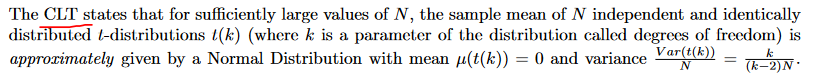

#### a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable size = 100, 000.

In [3]:
k = 3
N = [5, 10, 30]
size = 100000

#### b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)

#### c) Compute the sample average along each row (i.e. you should get size sample averages), and plot their histogram in a subplot.

#### d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of sample averages which is given by the CLT as described above

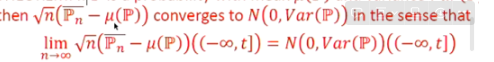

CDF notation given  states that as n goes to infinity with the CDF of t, will equal the CDF of t of the normal distribution,

(100000,)
(100000,)
(100000,)
(3, 100000)
Norm var:  0.6
Norm var:  0.3
Norm var:  0.1
(100,) (100,)
(100,) (100,)
(100,) (100,)


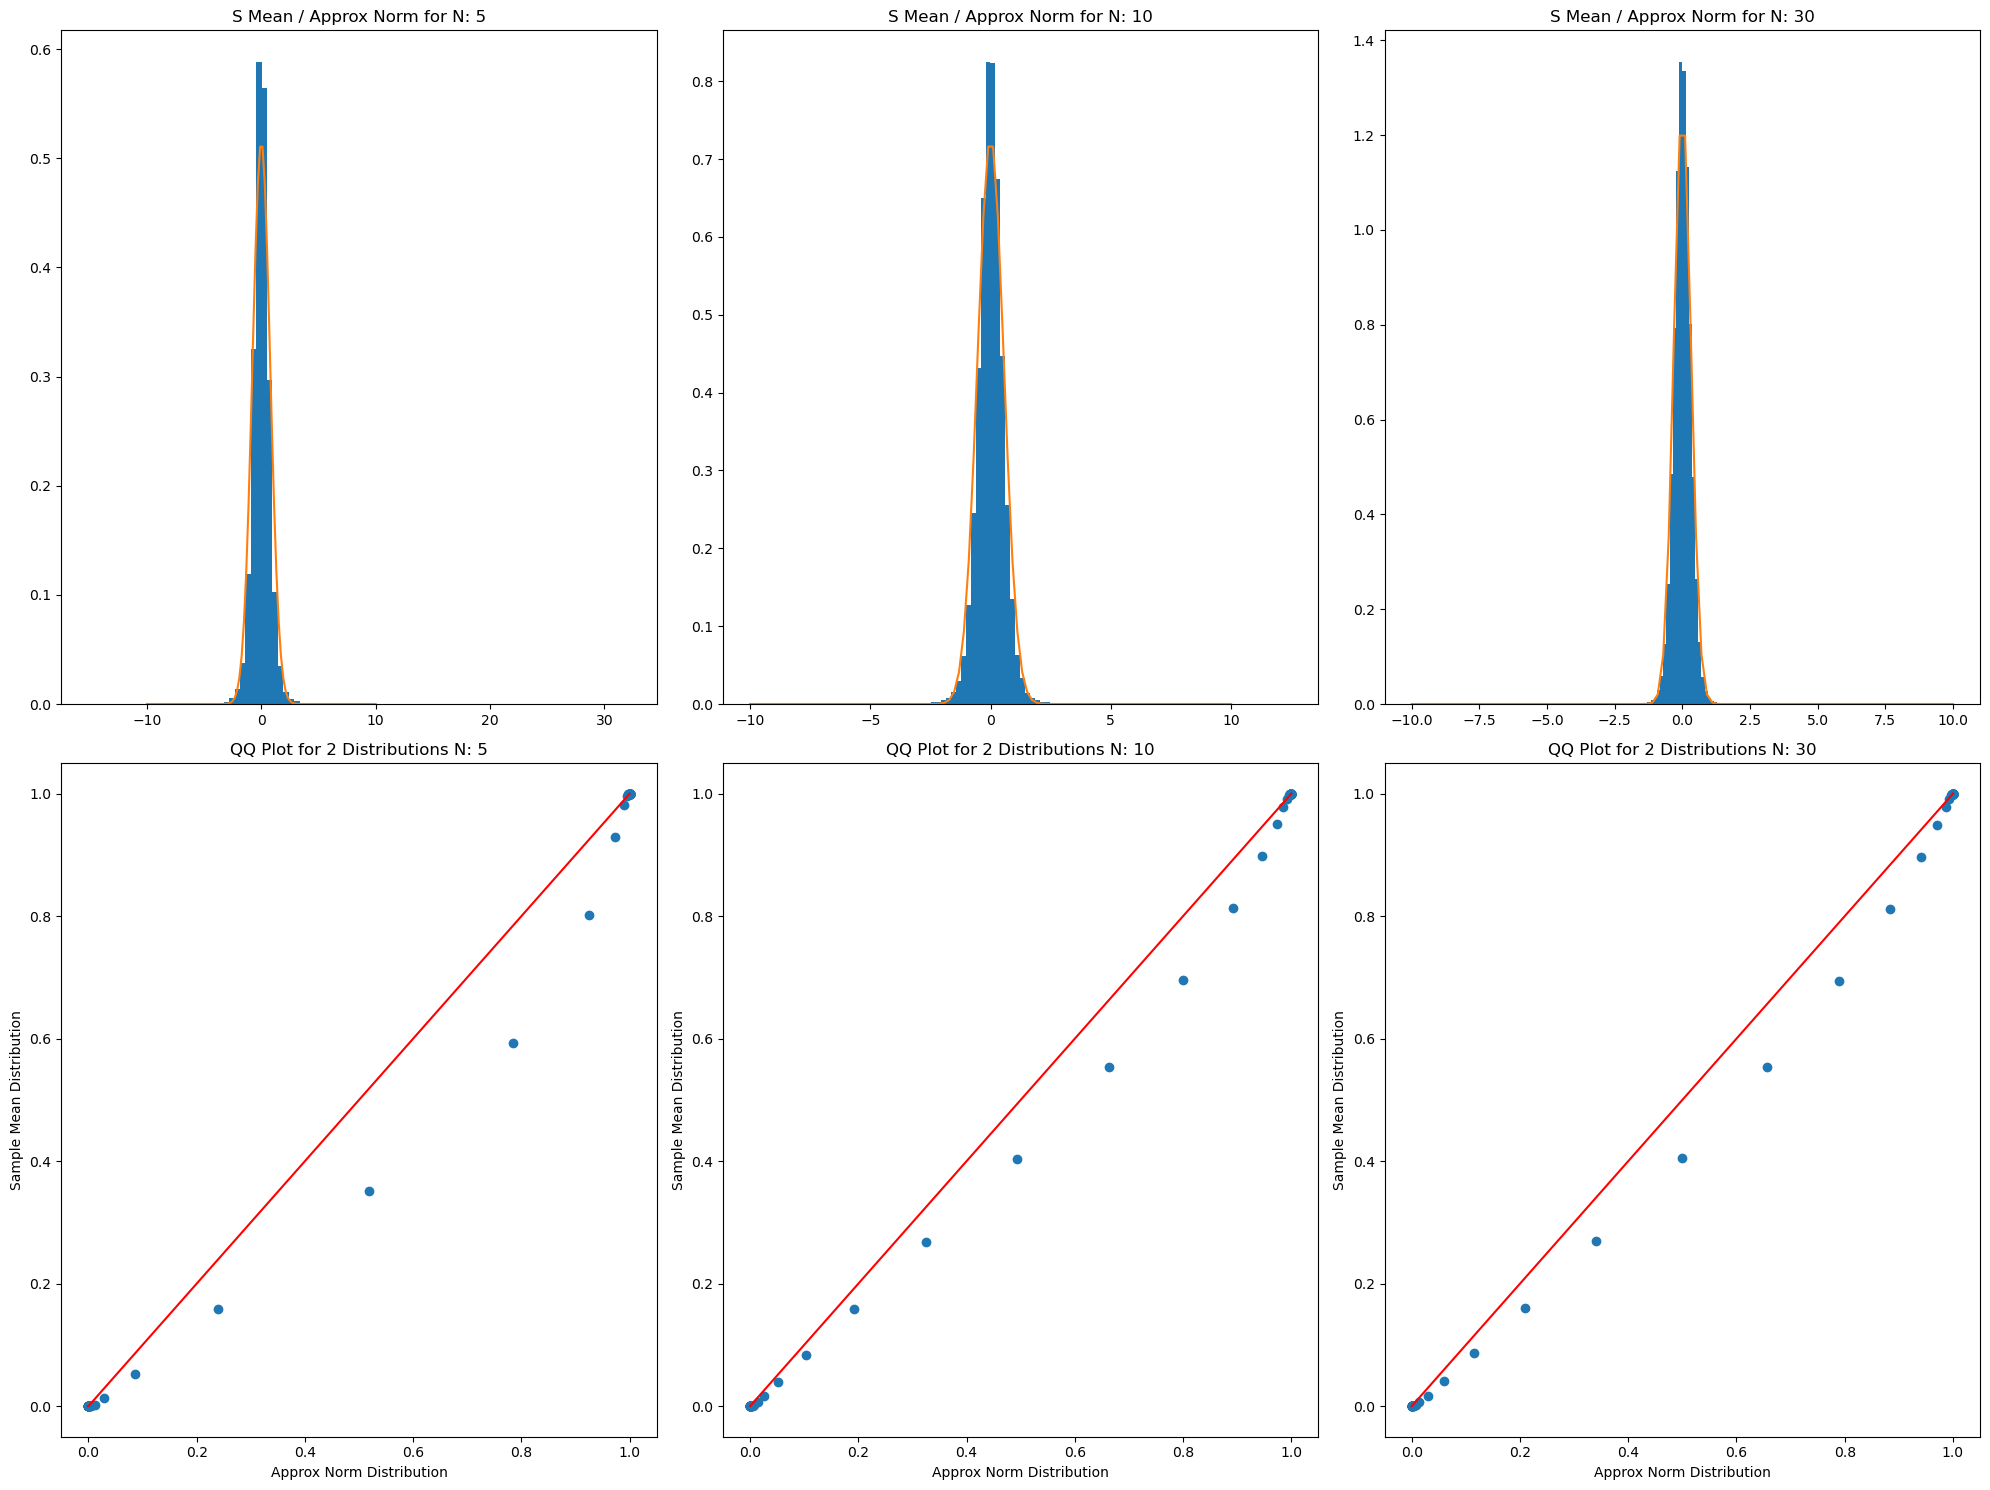

In [22]:
fig, ax = plt.subplots(2,3, figsize=(20, 15))

samples = []
seed = 101
for n in N:
    # Get n samples, given a mean of 0 and a variance of k/(k-2)*N.
    # This means mean = 0 and the variance being = 3/1*N
    # Norm takes parameter scale which is the standard deviation,
    # meaning we will need to square root this value.
    sample = []  # size, n
    for i in range(size):
        #sample.append(stats.norm.rvs(loc=norm_mu, scale=norm_std, size = n))  # , random_state = seed)
        sample.append(stats.t.rvs(df=k, size=n)) 
    # Mean
    mean_mat = np.array(sample).mean(axis=1)
    print(mean_mat.shape)
    
    samples.append(mean_mat)

samples = np.array(samples)
print(samples.shape)

# Approximate density, I am assuming they want a PDF of each distribution. Based on the sample data
# I did this last lab, but not sure if this was correct.


for i in range(samples.shape[0]):
    ax[0,i].set_title(f"S Mean {N[i]} Samples")
    # ax[0,i].set_xlim(-10, 10)
    ax[0,i].hist(samples[i], bins=100, density=True)

    norm_mu = 0
    norm_var = k / ((k-2) * N[i])
    print("Norm var: ", norm_var)
    # Plot PDF of the approximate histogram from CLT.
    x = np.linspace(-10, 10, 100)
    approx_density = stats.norm.pdf(x, loc=norm_mu, scale=np.sqrt(norm_var))

    ax[0,i].set_title(f"S Mean / Approx Norm for N: {N[i]}")
    ax[0,i].plot(x, approx_density)  # Showing the estimation of distribution it follows




#### c) Drawing QQ Plots for the sample means compared to thier approximate distribution


# Approximate distribution  
percentile = np.linspace(0,100,100)

for i in range(samples.shape[0]):
    x = np.linspace(np.min(samples[i]), np.max(samples[i]), size)
    norm_mu = 0
    norm_var = k / ((k-2) * N[i])
    
    y_norm = stats.norm.cdf(x, loc=norm_mu, scale=np.sqrt(norm_var))
    
    
    # ax[1,i].plot(x, y_norm, marker=".")
    # ax[1,i].set_title(f"Sample CDF n={N[i]}")

    
    # print(bin.shape, cdf.shape)
    cdf, _, _ = ax[1,i].hist(samples[i], bins=100, density=True, cumulative=True)
    ax[1,i].clear()
    
    qq_x = np.percentile(y_norm, percentile)
    qq_y = np.percentile(cdf, percentile)
    
    print(qq_x.shape, qq_y.shape)
    # Plot a graph for these. 


    # Recycling from Lab 2
    ax[1,i].set_title(f'QQ Plot for 2 Distributions N: {N[i]}')
    ax[1,i].set_xlabel("Approx Norm Distribution")
    ax[1,i].set_ylabel("Sample Mean Distribution")
    ax[1,i].plot(qq_y, qq_x, 'o')
    ax[1,i].plot(qq_x, qq_x, color='red') # straight line, for x on x.
    

plt.tight_layout()
plt.show()

####  Qc) For which value N is the approximate density of sample means given by the CLT a good approximation of the actual distribution from which you’ve drawn samples.

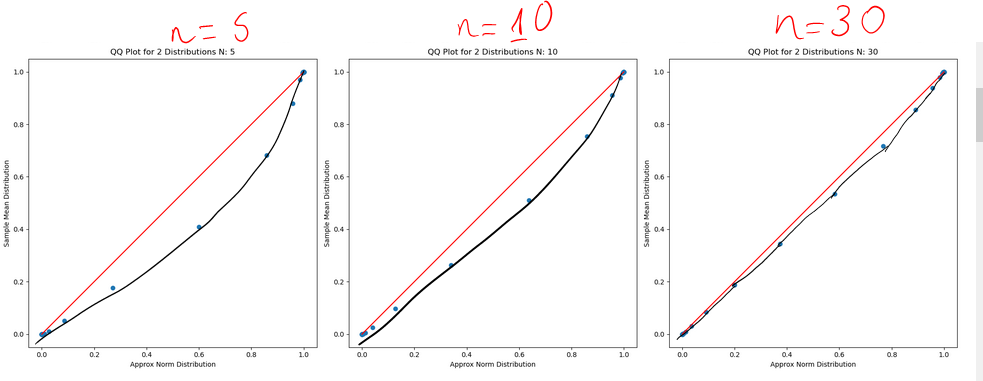

Each qq plot has 100 points, and at each we see the percentile that both hold, we can see that when n samples increase in the calculation of sample mean, the approx and sample distribution match more with less of a sag.

We can see that the CLT holds, that for more samples, the CDF of the approximated distribution and the sample distribution becomes equivalent is where n samples goes to infinity, so it makes sense for 30 samples to do much better as a prediction of how well the approximation fits the sample distribution.

This also confirms the statement in the lecture that describes this relationship.





------
# Question 2 Dow Jones Industrial Average from Stooq

In [5]:
import pandas_datareader . data as web

data = web.DataReader ('^DJI' , 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data ["Close"].to_numpy()
print(dates[0], dates[200])

2023-11-14 00:00:00 2023-01-30 00:00:00


## a) Plot the time series

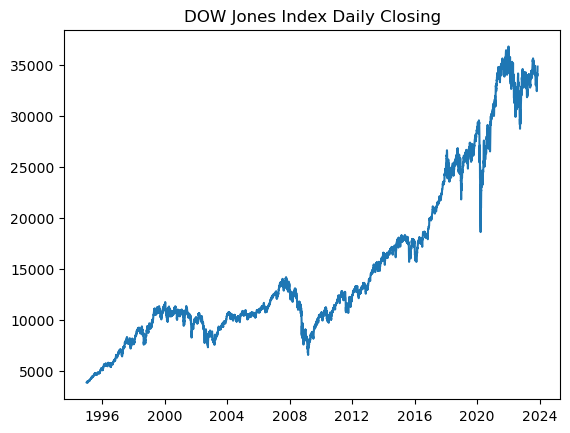

In [6]:
plt.title("DOW Jones Index Daily Closing") 
plt.plot(dates, dow)
plt.show()

Confirmed by Yahoo
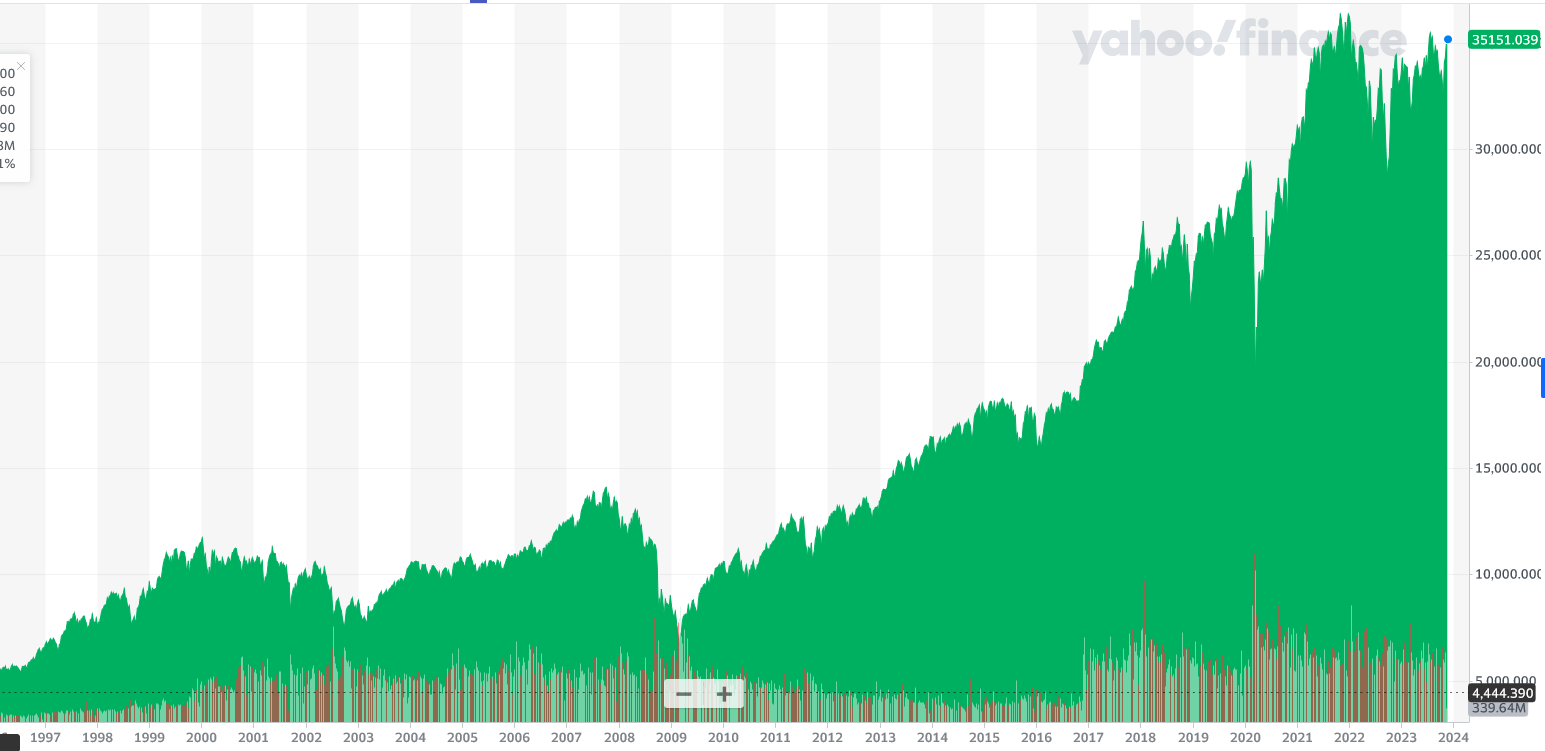

## b) Compute Daily Returns using Formula

Wanted to use function numpy.frompyfunc but difficult to understand, and was in accumulator mode, used a for loop instead. 

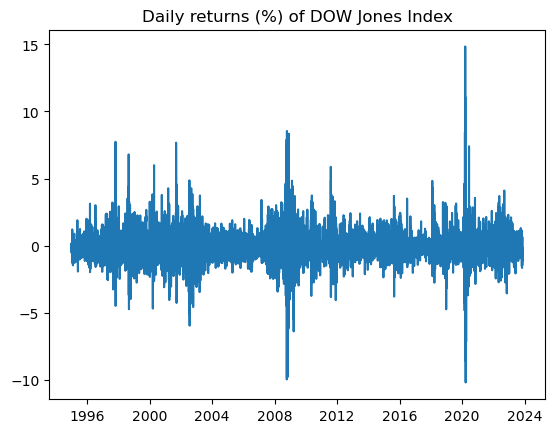

In [7]:
def return_daily(a, b):
    return 100 * ((a/b) -1)

# Nicely the data is in reverse, where recently is given first, we are going to reverse it to start with date oldest first.


dow_daily_returns = [] 

# I know this isn't effiecent, but its for lab, not system.
for index, daily in enumerate(dow):
     
    if index != 0:
        # print(f"Comparing to {str(dates[index])}, {str(dates[index-1])}")
        dow_daily_returns.append(return_daily(daily, dow[index-1]))
        

dow_daily_returns = np.array(dow_daily_returns)


plt.title("Daily returns (%) of DOW Jones Index")
plt.plot(dates[1:], dow_daily_returns)
plt.show()

## c) Compute length-n sample averages of daily returns | Law of Large Numbers

Here they want use to plot the sample average of these daily returns, progressively getting larger and larger sample data which based on the weak law of large numbers, should mean that we converge to the true mean of the daily average distribution (if of course the distribution has a mean and not large kurtosis). I have my doubts

Samples length: 7168


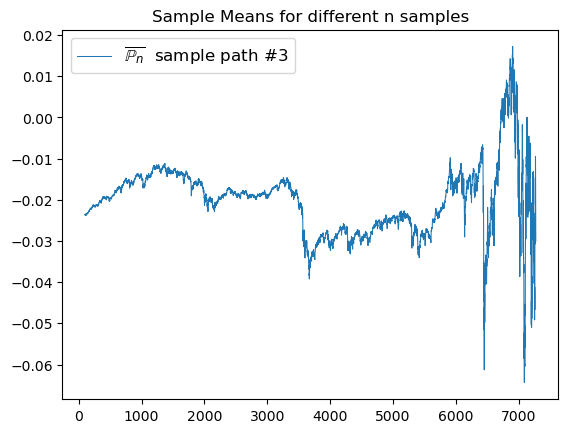

In [8]:
#print(f"Daily returns length: {len(dow_daily_returns)}")
samples = np.arange(100, len(dow_daily_returns), 1)
print(f"Samples length: {len(samples)}")

# x(7267,) and y(7168,)

path = np.zeros(len(samples))
for s_index, sample in enumerate(reversed(samples)):  # Reversed because the first index, shows the latest value of the day percentage and not the first.
    dow_sample = dow_daily_returns[:sample]
    path[s_index] = np.mean(dow_sample)
    # print(np.mean(dow_sample))
#print(f"Path length: {len(path)}")
plt.plot(samples, path, linewidth = 0.75, label = r'$\overline{\mathbb{P}_n}~$ sample path #'+str(i+1))


# I can assume mean is 0 emperically, but then I would require to do a Hypothesis to test my assumption.
# Its safe to say we do not know the mean of the distribution.
plt.title("Sample Means for different n samples")
plt.legend(fontsize = 12)
plt.show()    

**No this doesn't follow the weak Law of Large Numbers**, which states

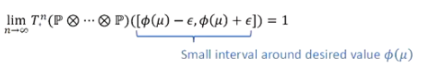

Technically, we cannot prove this, as we do not know the mean and the probability measure this distribution holds for.

But based purely on looks, which the question asks, it is not due to the sample means jumping drastically even after large n times, if it did follow the law of large numbers the sample mean would varying less drastically, such that, the probability of obtaining a sample mean within +- epislon range is 1. However we could not state this because of the variation in the mean which is drastic.

Another point is, the lecture confirmed this in Week 4, stating, in the real world, a lot of distributions have fat tails, picking your favourite stock and looking at daily return over 20 years, that distribution has (fat tails) excess kurtosis and for these processes the law of large numbers will not help, which confirms my answer.


-------


## d) Compute the length-100/400 rolling averages of daily returns. | Central Limit Theorem

Plot a histogram of these sample averages.
Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If
yes explain why, if not explain why this might be the case.

Ignore line graph was interested to see how it would look like


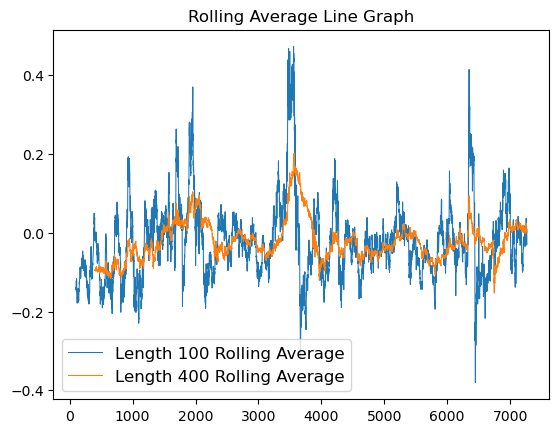

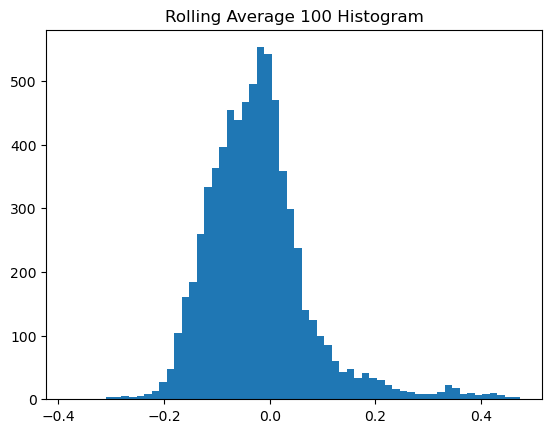

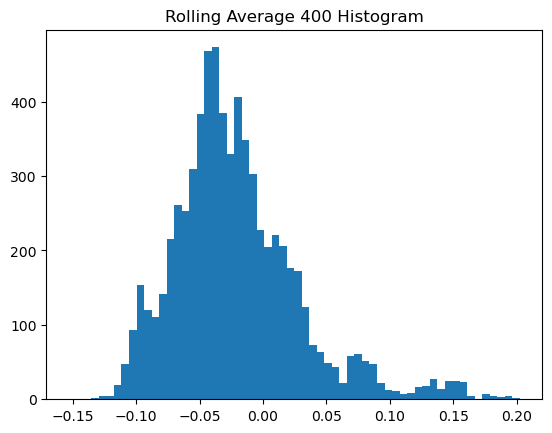

In [9]:
rolling_values = np.arange(100, len(dow_daily_returns), 1)
rolling_values_400 = np.arange(400, len(dow_daily_returns),1)
# print(f"Samples length: {len(samples)}")

# x(7267,) and y(7168,)

# Rolling 100 average.
path_100 = np.zeros(len(rolling_values))
for s_index, sample in enumerate(reversed(rolling_values)):  # Reversed because the first index, shows the latest value of the day percentage and not the first.
    dow_sample_100 = dow_daily_returns[sample-100:sample]
    path_100[s_index] = np.mean(dow_sample_100)  # mean is statistical version of average.
    
plt.plot(rolling_values, path_100, linewidth = 0.75, label = 'Length 100 Rolling Average')

# Rolling 400 average.
path_400 = np.zeros(len(rolling_values_400))
for s_index, sample in enumerate(reversed(rolling_values_400)):  # Reversed because the first index, shows the latest value of the day percentage and not the first.
    dow_sample_400 = dow_daily_returns[sample-400:sample]
    path_400[s_index] = np.mean(dow_sample_400)  # mean is statistical version of average.

plt.plot(rolling_values_400, path_400, linewidth = 0.75, label = 'Length 400 Rolling Average')

# I can assume mean is 0 emperically, but then I would require to do a Hypothesis to test my assumption.
# Its safe to say we do not know the mean of the distribution.
print("Ignore line graph was interested to see how it would look like")
plt.title("Rolling Average Line Graph")
plt.legend(fontsize = 12)
plt.show() 


# Now plotting histogram that they required.
plt.title("Rolling Average 100 Histogram")
plt.hist(path_100, bins=60)
plt.show()

# Now plotting histogram that they required.
plt.title("Rolling Average 400 Histogram")
plt.hist(path_400, bins=60)
plt.show()



**Yes it obeys Central Limit Theorem**

Central limit theorem states that with any probability measure with a mean and variance we will be able to define normal distribution with mean 0 and variance of the probability measure. 

Visually we can see that the distribution of both distributions does not have high kurtosis so should have a mean, and in regards to variance, as this is the measure of spread, based on visually looking at the distributions, it seems to have a majority of its mass around the center of the distribution, leading me to believe it has a variance.

Due to the distribution I suspect has a mean and variance, with slight to no skew and no kurtosis, I would state it does obey Central limit theorem.

------
## e) Compute the sample mean, variance, skewness and kurtosis of the daily returns.

Based on this
information, suggest which family of distributions might model these daily returns. Briefly justify
your choice.

Mean:
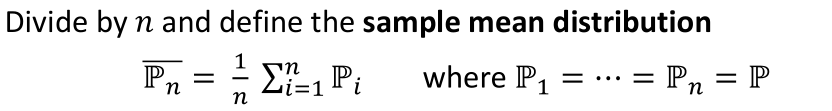

Variance:
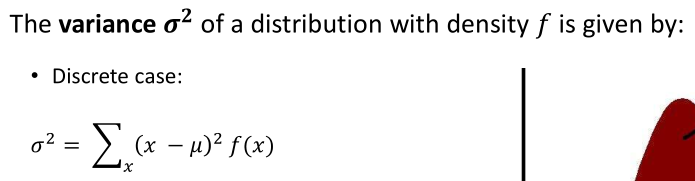

Skewness:
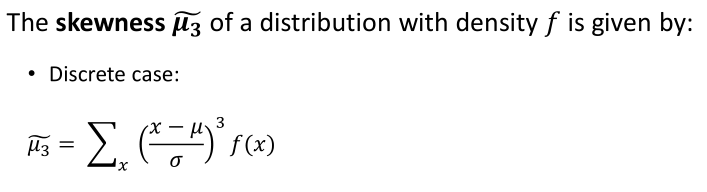


Kurtosis: 
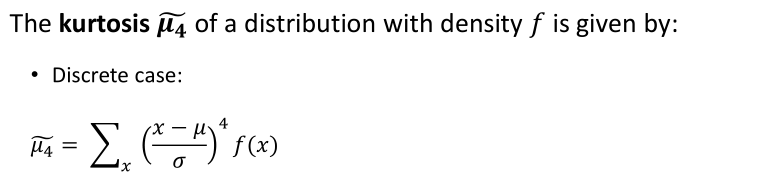

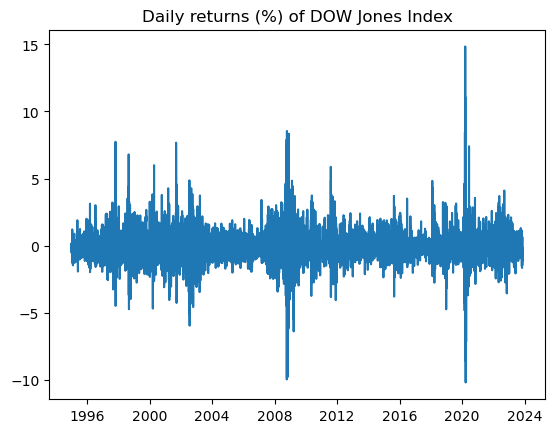

Sample Mean of Daily Returns is: -0.023722955410124806
Sample Variance: 1.3280669272904766
Sample Skewness: 0.6480631209171596
Sample Kurtosis: 15.977814548311434
Sample Excess Kurtosis: 12.977814548311434


In [10]:
plt.title("Daily returns (%) of DOW Jones Index")
plt.plot(dates[1:], dow_daily_returns)
plt.show()


# Sample Mean of the Daily Returns
# I mean we could randomly select, or just take all of these values summed and divided by n.
sample_mean = np.mean(dow_daily_returns)
print(f"Sample Mean of Daily Returns is: {sample_mean}")


# Sample Variance of the Daily Returns
sample_var_set = (dow_daily_returns - sample_mean)**2
sample_variance = np.mean(sample_var_set)
print(f"Sample Variance: {sample_variance}")


# Sample Skewness of the Daily Returns, we require the density function f(x).
# sample_skewness = stats.skew(dow_daily_returns)  # 0.6480631209171596
sample_skewness = ((dow_daily_returns - sample_mean) / np.sqrt(sample_variance))** 3
print(f"Sample Skewness: {np.mean(sample_skewness)}")


# Sample Kurtosis of the Daily Returns, we require the density function.
# sample_kurtosis = stats.kurtosis(dow_daily_returns)  # 12.97781454831144
sample_kurtosis = ((dow_daily_returns - sample_mean) / np.sqrt(sample_variance)) **4
print(f"Sample Kurtosis: {np.mean(sample_kurtosis)}")


sample_excess_kurtosis = np.mean(sample_kurtosis) - 3
print(f"Sample Excess Kurtosis: {sample_excess_kurtosis}")



Based on the features we can deduce the type of distribution it was, 

Positive skew,
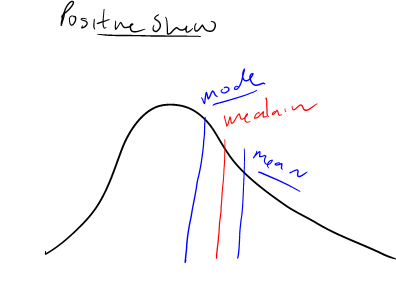
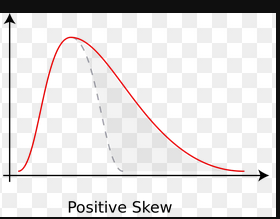

We have a mean roughly in the middle.

Variance of 1.32, is a relatively small value. In the context of variance, smaller values indicate less dispersion, and larger values indicate greater dispersion. A quicky calculation of square root of 1.32 is 1.14, meaning, on average, sample points are to be 1.14 units away from the mean.

So within the range of -0.02 +-1.14.

In terms of kurtosis, and excess kurtosis, 

Kurtosis is 15.977, which means our distribution is Leptopkurtic, as K > 0, for normal curve we would require K=0.

We also support values that are negative.

Due to these probabities, we are looking at a heavy tailed distribution due to the kurtosis, with higher likelihood of extreme values compared to normal distribution. And a distribution that is Leptopkurtic.

Like the following:

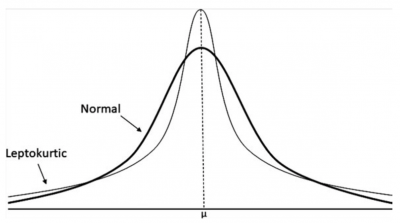


#### With all of these properties of the distribution we can shortlist to a few.

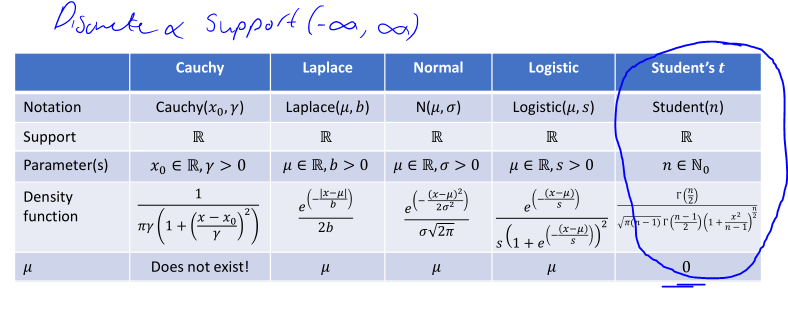

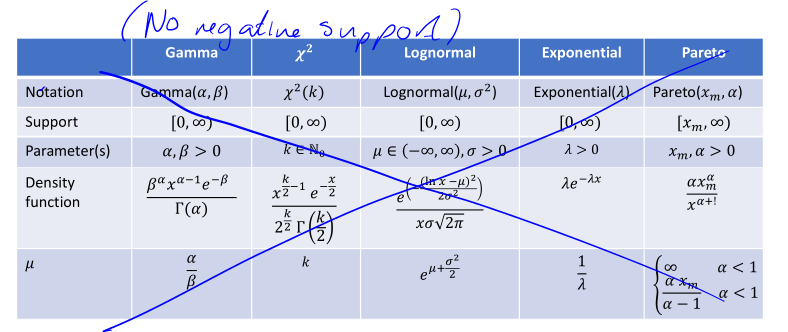


Amazingly and conciendentally, the only distribution I could find in Week 2 slides which does match the description, is the **T distribution**, which was also mentioned earlier in the lab, amazing :)) It has a infinite support, is of mean 0 and has Leptopkurtic.

------
## f) For this choice of family, you will now estimate the parameter(s) which best explain the data using the Maximum Likelihood Estimator approach

• Implement the function which needs to be maximized (this was explained in the lectures). The
parameter(s) which you are trying to estimate must of course be inputs to this function.

• Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maxi-
mizing f (x) is the same thing as minimizing −f (x)). You can use any of the actual minimization
methods, as long as it gives you a sensible answer.

In [2]:
# (i) Implement function to be maximised.
def maximise_t_dist_param(x):
    """ The parameter that this distribution holds is df, which is adjustable.
        As we want to maximise the output of this function with samples and parameter given,
        to do this, we should find the function, that differentiates to 0 wrt to the parameter df.   
        parameter: df
        obs = observation samples, which are the daily average values.
        I am probably sure they don't want us to determine the derivative w.t.r df for the distribution, because the optimiser does that surely. 
        parameters of the distribution, degree of freedom, mean, standard deviation
    """
    df, mu, std = x
    return -np.sum(np.log(stats.t.pdf(dow_daily_returns, df, mu, std)))
   

    
# (ii) Minimise the function using scipy.optimize optimise -f(x) and we get a sensible x value which we can use.
from scipy.optimize import minimize
print("Running minimization function")
estimator = minimize(maximise_t_dist_param , [1, 0, 1],  options={ 'disp': True})
estimated_df, estimated_mu, estimated_scale = estimator.x


# (iii) Plot PDF of optimal distribution, against histogram (PDF, density=True) of the daily returns.

# - Plot PDF of distribution of fit parameters with histogram of daily returns. 
counts, bins, _ = plt.hist(dow_daily_returns, density=True, bins=np.sqrt(len(dow_daily_returns)))
plot_x  =np.linspace(bins[0], bins[-1], np.sqrt(len(dow_daily_returns)))
plt.title("Daily Return Sample PDF compared to scipy fit function for same t distribution")
plt.plot(plot_x, stats.t.pdf(plot_x, estimated_df, estimated_mu, estimated_scale))
plt.show()



Running minimization function


NameError: name 'np' is not defined

------
## g) Check the results you obtained in the previous step by comparing it with the parameters you obtain from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a histogram of the daily returns


2.853495932310387 -0.06274107728130038 0.6888110968432781


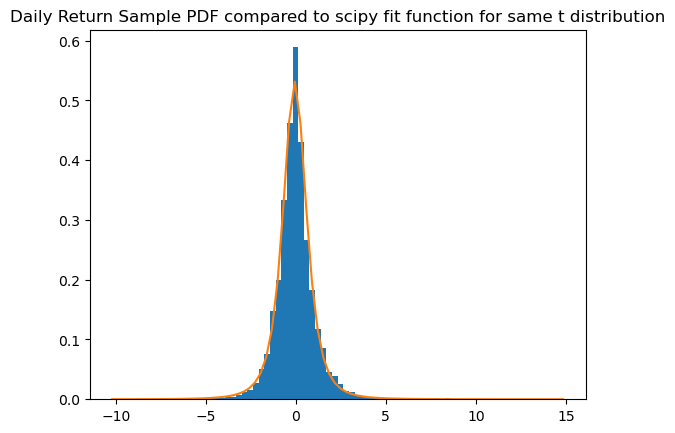

In [18]:
# - Compare optimal parameters obtained vs fit parameter values, see if they are similar.
fit_df, fit_mu, fit_scale = stats.t.fit(dow_daily_returns)
print(fit_df, fit_mu, fit_scale )
# - Plot PDF of distribution of fit parameters with histogram of daily returns. 
counts, bins, _ = plt.hist(dow_daily_returns, density=True, bins=len(dow_daily_returns)//90)
plot_x  =np.linspace(bins[0], bins[-1], len(dow_daily_returns)//90)
plt.title("Daily Return Sample PDF compared to scipy fit function for same t distribution")
plt.plot(plot_x, stats.t.pdf(plot_x, fit_df, fit_mu, fit_scale))
plt.show()


# End of Lab Work

#### Really rewarding, learnt alot and was fun. 
#### Michael Peres

----------